In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import matplotlib.image as mpimg
import tensorflow.keras as keras
import tensorflow as tf

2024-05-08 16:08:26.923780: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 16:08:26.923891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 16:08:27.028444: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading in the Data

In [3]:
(trainX, trainy), (testX, testy) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


# Exploring the Data

In [4]:
print("X Train Shape: ", trainX.shape)
print("First element of X Train: ", trainX[0])

X Train Shape:  (50000, 32, 32, 3)
First element of X Train:  [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
print("Y Train Shape: ", trainy.shape)
print("First 5 elements of Y Train: ", trainy[:5])

Y Train Shape:  (50000, 1)
First 5 elements of Y Train:  [[6]
 [9]
 [9]
 [4]
 [1]]


# Scaling the data


In [6]:
X_train_scaled = trainX/255
X_test_scaled = testX/255

# Building the Neural Network

In [12]:
trainy = trainy.ravel()

In [15]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.Input(shape=(32,32,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# training the neural network
model.fit(X_train_scaled, trainy, validation_split=0.1, epochs=10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.2663 - loss: 2.0335 - val_acc: 0.3600 - val_loss: 1.7766
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3764 - loss: 1.7363 - val_acc: 0.3994 - val_loss: 1.6601
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4146 - loss: 1.6393 - val_acc: 0.4120 - val_loss: 1.6491
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4307 - loss: 1.5955 - val_acc: 0.4340 - val_loss: 1.5969
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4452 - loss: 1.5469 - val_acc: 0.4486 - val_loss: 1.5723
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4516 - loss: 1.5335 - val_acc: 0.4502 - val_loss: 1.5449
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4634 - loss: 1.5046 - val_acc: 0.4464 - val_loss: 1.5362
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4681 - loss: 1.4914 - val_acc: 0.4674 - val_loss: 1.5304
Epoch 9/10
1407/1407 ━━━━━━━━━━━━━━━━━━━

It is evident that our model performed worst on training and validation sets. Therefore, we will now use ResNet50 to train on the same dataset and lets see the difference in accuracy.

# Loading ResNet50

In [16]:
resnet50 = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
resnet50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Training ResNet50

In [21]:
num_of_classes = 10

model = keras.models.Sequential()
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(keras.layers.UpSampling2D((2,2)))
model.add(resnet50)
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train_scaled, trainy, validation_split=0.1, epochs=10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 342s 200ms/step - acc: 0.3450 - loss: 1.9608 - val_acc: 0.8296 - val_loss: 0.6628
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.6997 - loss: 1.0002 - val_acc: 0.9028 - val_loss: 0.3938
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.8227 - loss: 0.6968 - val_acc: 0.9220 - val_loss: 0.3030
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.8804 - loss: 0.5226 - val_acc: 0.9318 - val_loss: 0.2595
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.9213 - loss: 0.3921 - val_acc: 0.9400 - val_loss: 0.2276
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.9426 - loss: 0.3124 - val_acc: 0.9404 - val_loss: 0.2148
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.9592 - loss: 0.2439 - val_acc: 0.9444 - val_loss: 0.1989
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 246s 175ms/step - acc: 0.9675 - loss: 0.2028 - val_acc: 0.9472 - val_loss: 0.1992
Epoch 9/

# Evaluating the Model

In [22]:
loss, accuracy = model.evaluate(X_test_scaled, testy.ravel())
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - acc: 0.9421 - loss: 0.2140
Test Accuracy = 0.9438999891281128


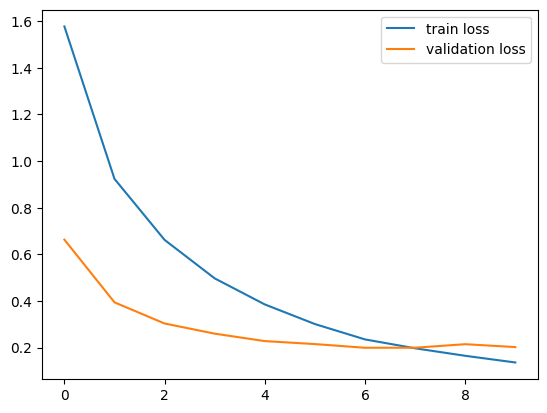

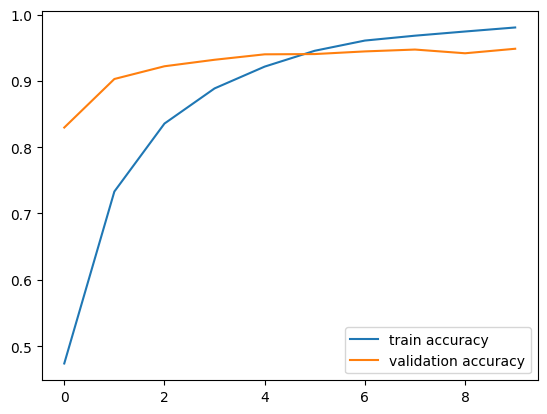

In [23]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [24]:
model.save('resnet50-cifar10.keras')

In [30]:
# keras.models.save_model(model, filepath='resnet50-cifar10-model.h5', save_format='hdf5')
model.save('resnet50-cifar10.h5')

ValueError: Unable to synchronously create dataset (name already exists)

'2.15.0'